In [73]:
import pandas as pd

# Загрузка данных
url = 'https://drive.google.com/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1'
df = pd.read_csv(url)

# Просмотр первых строк данных

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [74]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Проверим наличие дубликатов

In [76]:
print(df.duplicated().sum())

3008


В данных присутвует двольно много повторяющихся строк, однако контекст данных позволяет предположить, что это не ошибка. Поэтому принимаем решение не удалять дубликаты.

In [77]:
df.describe().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


Рассчитаем основные статистики: среднее, медиана, мода, мин/макс, среднее отклонение.

In [78]:
# Выбор только числовых переменных
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Основные статистики
statistics = numeric_df.describe().T
statistics['median'] = numeric_df.median()
statistics['mode'] = numeric_df.mode().iloc[0]
statistics['std'] = numeric_df.std()
statistics


,count,mean,std,min,25%,50%,75%,max,median,mode
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0,0.64,0.10
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0,0.72,0.55
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0,4.00,4.00
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0,200.00,135.00
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0,3.00,3.00
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0,0.00,0.00
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0,0.00,0.00
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0,0.00,0.00


Шаг 3: Корреляционная матрица
Рассчитаем и визуализируем корреляционную матрицу для количественных переменных.

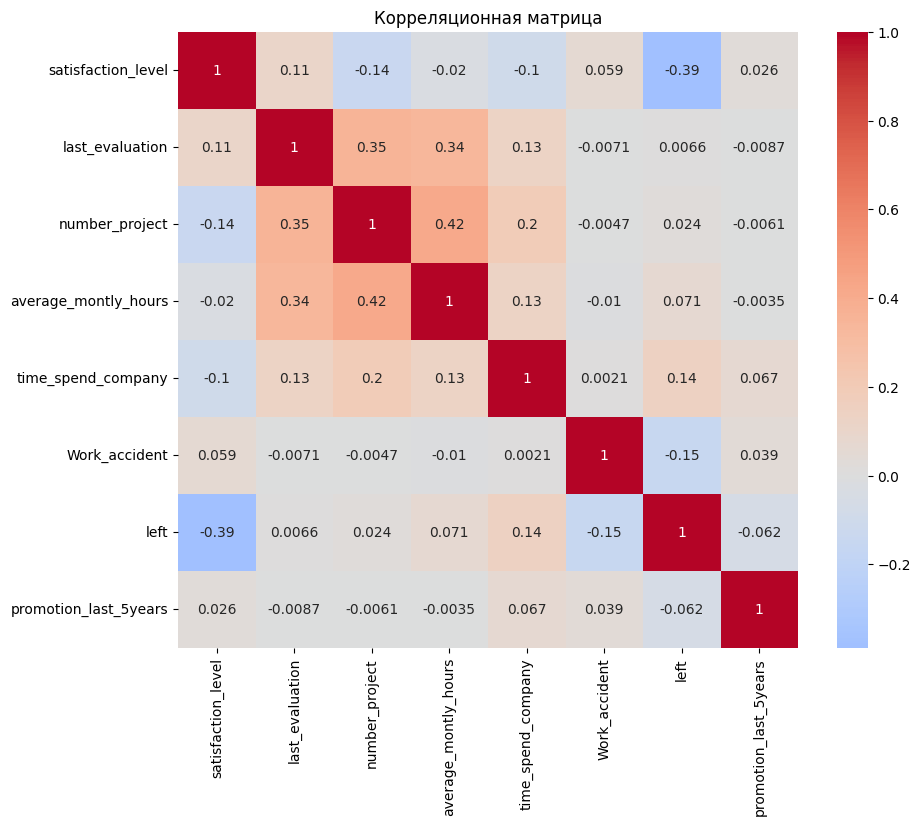

Две самые скоррелированные переменные - значение по модулю:
 number_project  average_montly_hours    0.417211
dtype: float64
Две наименее скоррелированные переменные - значение по модулю:
 time_spend_company  Work_accident    0.00212
dtype: float64


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Корреляционная матрица
corr_matrix = numeric_df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.show()

# Определение двух самых скоррелированных и двух наименее скоррелированных переменных
corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort")

# Исключаем корреляции переменных с самими собой
corr_pairs = corr_pairs[corr_pairs != 1]

# Две самые скоррелированные переменные (по модулю)
high_corr = corr_pairs.abs().sort_values(ascending=False).head(1)

# Две наименее скоррелированные переменные (по модулю ближе к нулю)
low_corr = corr_pairs.abs().sort_values().head(1)

print("Две самые скоррелированные переменные - значение по модулю:\n", high_corr)
print("Две наименее скоррелированные переменные - значение по модулю:\n", low_corr)

Явных признаков мультиколинеарности не выявлено.

Количество сотрудников в каждом департаменте

In [80]:
# Количество сотрудников в каждом департаменте
department_counts = df['department'].value_counts()
department_counts

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

Шаг 5: Распределение сотрудников по зарплатам

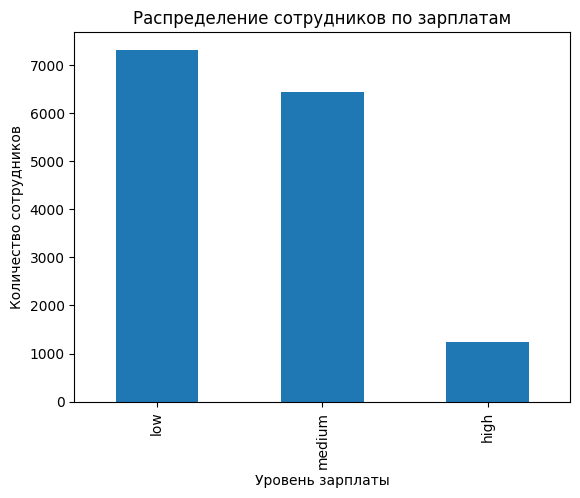

In [81]:
# Распределение сотрудников по зарплатам
salary_distribution = df['salary'].value_counts()
salary_distribution.plot(kind='bar')
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.show()

Шаг 6: Распределение сотрудников по зарплатам в каждом департаменте

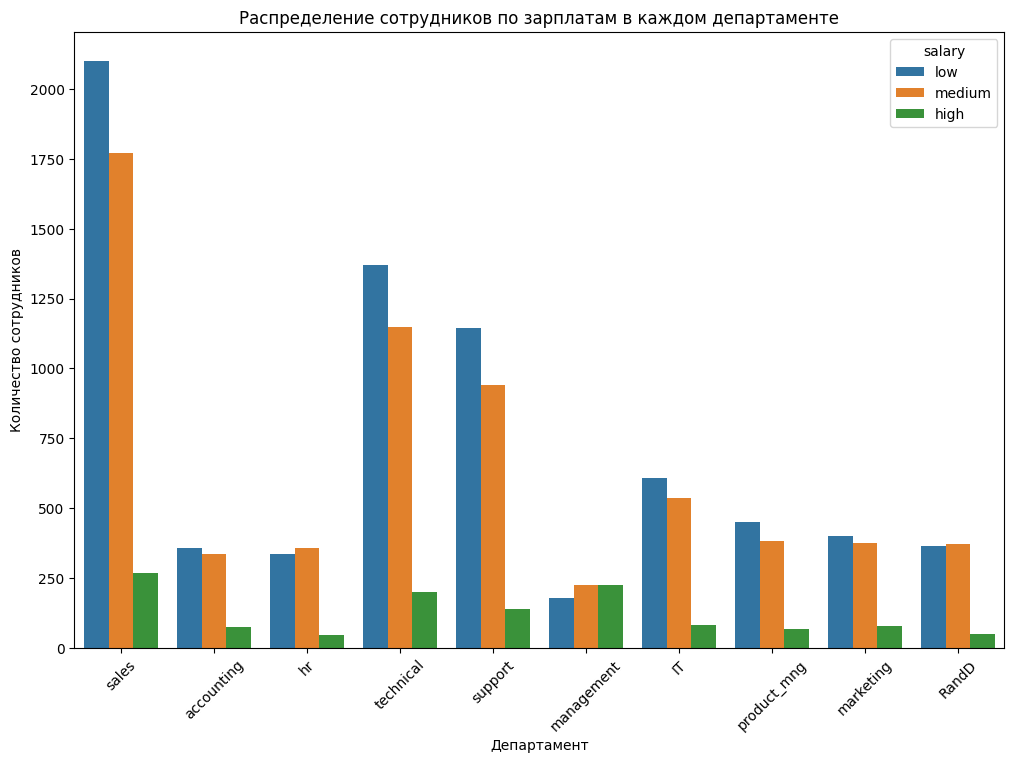

In [82]:
# Распределение сотрудников по зарплатам в каждом департаменте
plt.figure(figsize=(12, 8))
sns.countplot(x='department', hue='salary', data=df)
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=45)
plt.show()

Шаг 7: Проверка гипотезы о времени на работе и уровне зарплаты

T-statistic: -0.7288680398062308, P-value: 0.4661023478267259


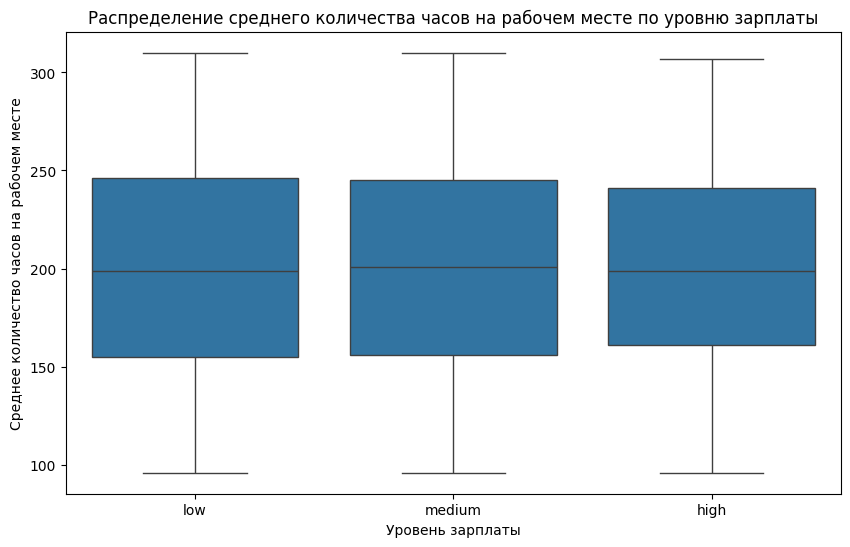

In [83]:
## Проверка гипотезы
high_salary_hours = df[df['salary'] == 'high']['average_montly_hours']
low_salary_hours = df[df['salary'] == 'low']['average_montly_hours']

# Статистический тест
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(high_salary_hours, low_salary_hours)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

plt.figure(figsize=(10, 6))
sns.boxplot(x='salary', y='average_montly_hours', data=df)
plt.title('Распределение среднего количества часов на рабочем месте по уровню зарплаты')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Среднее количество часов на рабочем месте')
plt.show()

Результаты t-теста
T-statistic: -0.7288680398062308
P-value: 0.4661023478267259
Интерпретация результатов
P-value:

P-value (значение p) равно 0.466. Это значение значительно больше стандартного уровня значимости 0.05.
Высокое значение p указывает на то, что нет достаточных оснований для отклонения нулевой гипотезы. Нулевая гипотеза утверждает, что нет значимой разницы между средним количеством часов, проведенных на работе, для сотрудников с высоким и низким окладом.

T-статистика равна -0.7288680398062308. Это значение само по себе не имеет большого значения без контекста p-value, но оно указывает на направление разницы (в данном случае, отрицательное значение указывает на то, что среднее количество часов для сотрудников с высоким окладом немного меньше, чем для сотрудников с низким окладом).
Заключение
На основе результатов t-теста и визуализации данных можно сделать следующие выводы:

Нет статистически значимой разницы: P-value значительно больше 0.05, что указывает на отсутствие статистически значимой разницы между средним количеством часов, проведенных на работе, для сотрудников с высоким и низким окладом.
Гипотеза не подтверждена: Гипотеза о том, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом, не подтверждается на основе имеющихся данных.
Эти выводы означают, что уровень зарплаты не является значимым фактором, влияющим на среднее количество часов, проведенных на рабочем месте.

Violin plot для среднего количества часов на рабочем месте по уровню зарплаты

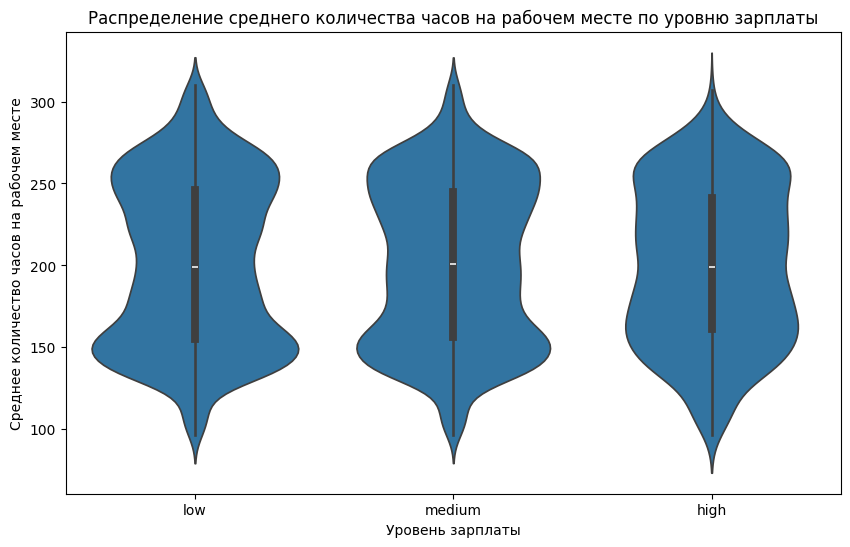

In [84]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='salary', y='average_montly_hours', data=df)
plt.title('Распределение среднего количества часов на рабочем месте по уровню зарплаты')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Среднее количество часов на рабочем месте')
plt.show()

Histogram для среднего количества часов на рабочем месте по уровню зарплаты

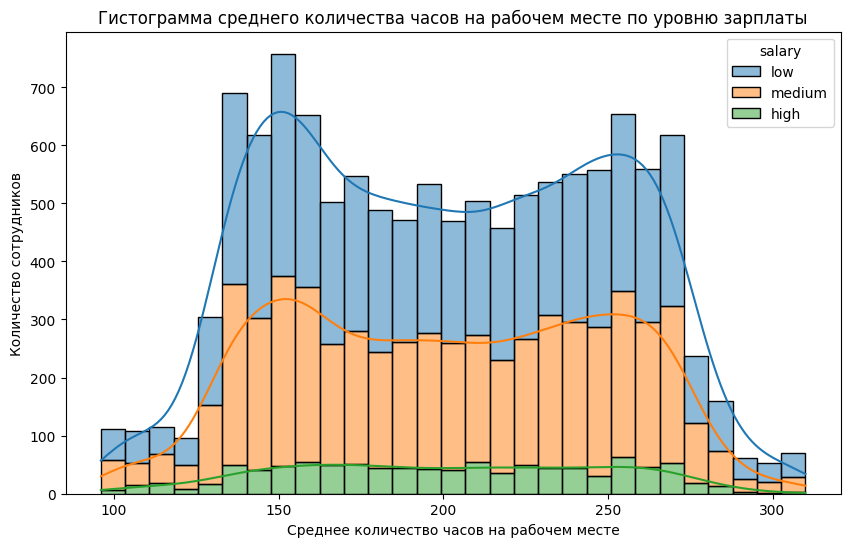

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='average_montly_hours', hue='salary', multiple='stack', kde=True)
plt.title('Гистограмма среднего количества часов на рабочем месте по уровню зарплаты')
plt.xlabel('Среднее количество часов на рабочем месте')
plt.ylabel('Количество сотрудников')
plt.show()

Шаг 8: Показатели среди уволившихся и не уволившихся сотрудников

In [ ]:
# Показатели среди уволившихся и не уволившихся сотрудников
left_group = df[df['left'] == 1]
stayed_group = df[df['left'] == 0]

# Доля сотрудников с повышением за последние 5 лет
promotion_left = left_group['promotion_last_5years'].mean()
promotion_stayed = stayed_group['promotion_last_5years'].mean()

# Средняя степень удовлетворенности
satisfaction_left = left_group['satisfaction_level'].mean()
satisfaction_stayed = stayed_group['satisfaction_level'].mean()

# Среднее количество проектов
projects_left = left_group['number_project'].mean()
projects_stayed = stayed_group['number_project'].mean()

print(f"Доля сотрудников с повышением за последние 5 лет (уволившиеся): {promotion_left}")
print(f"Доля сотрудников с повышением за последние 5 лет (не уволившиеся): {promotion_stayed}")
print(f"Средняя степень удовлетворенности (уволившиеся): {satisfaction_left}")
print(f"Средняя степень удовлетворенности (не уволившиеся): {satisfaction_stayed}")
print(f"Среднее количество проектов (уволившиеся): {projects_left}")
print(f"Среднее количество проектов (не уволившиеся): {projects_stayed}")

Доля сотрудников с повышением за последние 5 лет (уволившиеся): 0.004018081366147665
Доля сотрудников с повышением за последние 5 лет (не уволившиеся): 0.0195
Средняя степень удовлетворенности (уволившиеся): 0.440271220492215
Средняя степень удовлетворенности (не уволившиеся): 0.667365
Среднее количество проектов (уволившиеся): 3.8834756403817177
Среднее количество проектов (не уволившиеся): 3.7868


Шаг 9: Построение модели LDA

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Подготовка данных
X = df.drop(columns=['left', 'department', 'salary'])
y = df['left']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Построение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

# Оценка модели
y_pred = lda.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3429
           1       0.49      0.26      0.34      1071

    accuracy                           0.76      4500
   macro avg       0.65      0.59      0.60      4500
weighted avg       0.73      0.76      0.73      4500



Визуализация результатов

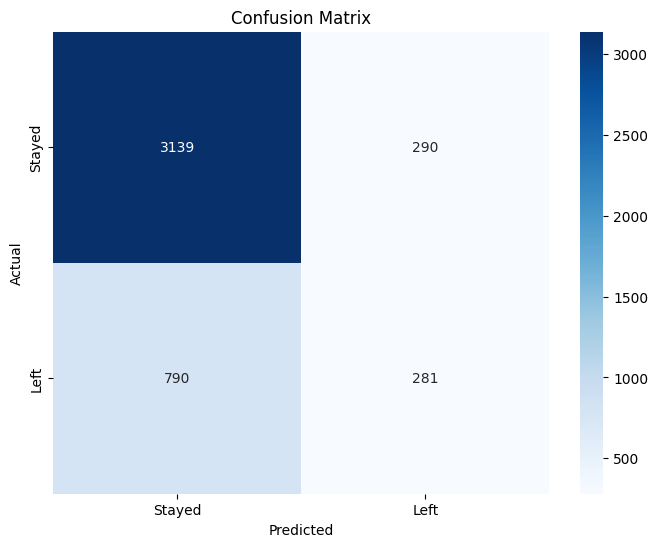

In [86]:
# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.744
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      3429
           1       0.48      0.76      0.58      1071

    accuracy                           0.74      4500
   macro avg       0.69      0.75      0.70      4500
weighted avg       0.80      0.74      0.76      4500



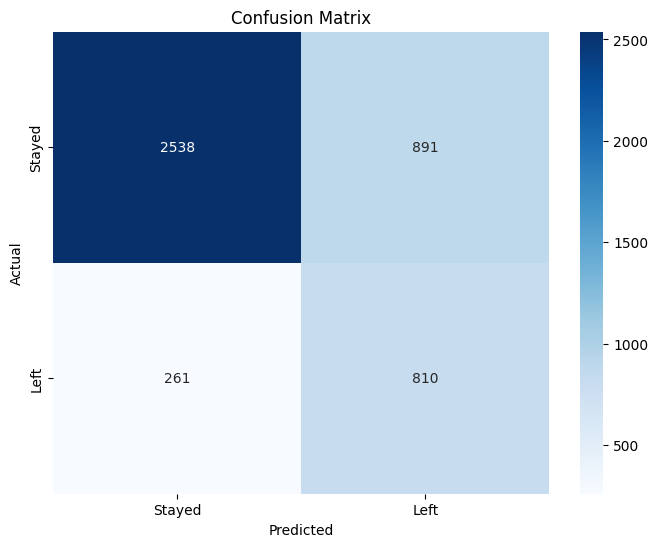

In [87]:
from imblearn.over_sampling import SMOTE

# Применение SMOTE для увеличения количества наблюдений класса 1
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


# Построение модели LDA на ресэмплированных данных
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_resampled, y_train_resampled)
# Оценка модели
y_pred = lda.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


    Модель 1 имеет немного более высокую общую точность (0.76 против 0.744), но значительно хуже справляется с предсказанием класса 1 (уволился), имея низкую полноту (0.26) и F1-меру (0.34).
    Модель 2 имеет немного меньшую общую точность (0.744), но значительно лучше справляется с предсказанием класса 1, имея высокую полноту (0.76) и F1-меру (0.58).
